The main objective was to explore data from the last few months & determine which day of the week & time worked best in terms of revenue generation. This only applies to Email Marketing.

I started off by just trying things out on last month's data since client had many campaigns sent out during the last 40 days.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("email_campaign_data.csv")

In [ ]:
df['Send Time'] = pd.to_datetime(df['Send Time'])

In [ ]:
df['Send Hour'] = df['Send Time'].dt.hour

In [ ]:
df['Click Rate'] = df['Click Rate'].astype(str).str.rstrip('%').astype(float) / 100
df['Open Rate'] = df['Open Rate'].astype(str).str.rstrip('%').astype(float) / 100
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

In [ ]:
print(df[['Click Rate', 'Revenue']].dtypes)

Click Rate    float64
Revenue       float64
dtype: object


In [ ]:
#Aggregating Click & Open Rate (avg) + Revenue (sum)
weekday_analysis = df.groupby('Send Weekday').agg(
    mean_click_rate=('Click Rate', 'mean'),
    mean_open_rate=('Open Rate', 'mean'),
    total_revenue=('Revenue', 'sum'),
    campaign_count=('Campaign ID', 'count')
).sort_values(by='total_revenue', ascending=False)

hour_analysis = df.groupby('Send Hour').agg(
    mean_click_rate=('Click Rate', 'mean'),
    mean_open_rate=('Open Rate', 'mean'),
    total_revenue=('Revenue', 'sum'),
    campaign_count=('Campaign ID', 'count')
).sort_values(by='total_revenue', ascending=False)

In [ ]:
print("Performance by Weekday:")
print(weekday_analysis)

print("\nPerformance by Hour Sent:")
print(hour_analysis)

Performance by Weekday:
              mean_click_rate  mean_open_rate  total_revenue  campaign_count
Send Weekday                                                                
Friday               0.014837        0.319225      407413.76               8
Tuesday              0.012775        0.330250      234087.80               4
Thursday             0.023625        0.324650      188939.58               4
Saturday             0.017000        0.331300      138139.80               2
Wednesday            0.018600        0.317900       99430.30               2
Monday               0.015200        0.334850       79219.42               2
Sunday               0.024000        0.322300       56998.75               1

Performance by Hour Sent:
           mean_click_rate  mean_open_rate  total_revenue  campaign_count
Send Hour                                                                
10                0.016100        0.311133      217323.32               3
9                 0.017633        

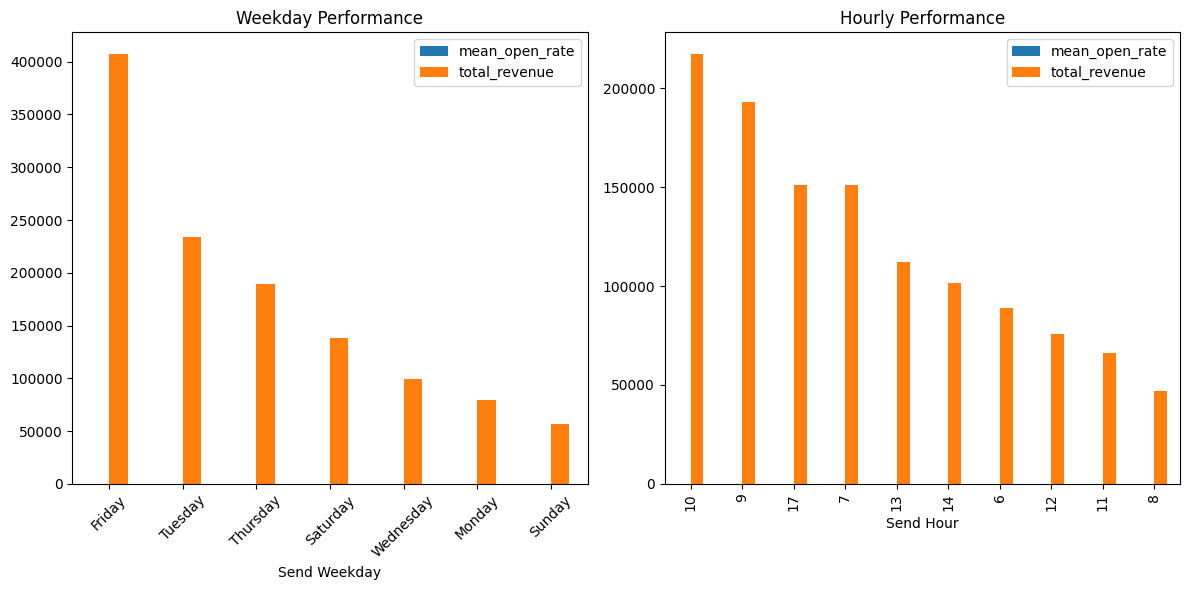

In [ ]:
plt.figure(figsize=(12, 6))

# Weekday Performance
plt.subplot(1, 2, 1)
weekday_analysis[['mean_open_rate', 'total_revenue']].plot(kind='bar', ax=plt.gca(), title="Weekday Performance")
plt.xticks(rotation=45)  # Rotating labels for better readability

# Hourly Performance
plt.subplot(1, 2, 2)
hour_analysis[['mean_open_rate','total_revenue']].plot(kind='bar', ax=plt.gca(), title="Hourly Performance")

plt.tight_layout()
plt.show()

Moving forward to analyzing all available data.

In [ ]:
df1 = pd.read_csv("email_marketing_analysis2.csv")

In [ ]:
df1['Send Time'] = pd.to_datetime(df['Send Time'])

In [ ]:
df1['Send Hour'] = df1['Send Time'].dt.hour

In [ ]:
df1['Click Rate'] = df1['Click Rate'].str.rstrip('%').astype(float) / 100

In [ ]:
df1['Open Rate'] = df1['Open Rate'].str.rstrip('%').astype(float) / 100

In [ ]:
df1['Revenue'] = pd.to_numeric(df1['Revenue'], errors='coerce')

In [ ]:
print(df1[['Click Rate', 'Open Rate', 'Revenue']].dtypes)

Click Rate    float64
Open Rate     float64
Revenue       float64
dtype: object


In [ ]:
# Agg by avg open, click rates & revenue
weekday_analysis = df1.groupby('Send Weekday').agg(
    mean_click_rate=('Click Rate', 'mean'),
    mean_open_rate=('Open Rate', 'mean'),
    total_revenue=('Revenue', 'mean'),
    campaign_count=('Campaign ID', 'count')
).sort_values(by='total_revenue', ascending=False)

hour_analysis = df1.groupby('Send Hour').agg(
    mean_click_rate=('Click Rate', 'mean'),
    mean_open_rate=('Open Rate', 'mean'),
    total_revenue=('Revenue', 'sum'),
    campaign_count=('Campaign ID', 'count')
).sort_values(by='total_revenue', ascending=False)

In [ ]:
print("Performance by Weekday:")
print(weekday_analysis)

print("\nPerformance by Hour Sent:")
print(hour_analysis)

Performance by Weekday:
              mean_click_rate  mean_open_rate  total_revenue  campaign_count
Send Weekday                                                                
Saturday             0.017000        0.331300      69069.900               2
Tuesday              0.012775        0.330250      58521.950               4
Sunday               0.024000        0.322300      56998.750               1
Friday               0.014837        0.319225      50926.720               8
Wednesday            0.018600        0.317900      49715.150               2
Thursday             0.023625        0.324650      47234.895               4
Monday               0.015200        0.334850      39609.710               2

Performance by Hour Sent:
           mean_click_rate  mean_open_rate  total_revenue  campaign_count
Send Hour                                                                
10                0.016100        0.311133      217323.32               3
9                 0.017633        

In [ ]:
best_time_df1 = df1.groupby(['Send Weekday', 'Send Hour']).agg(
    total_revenue=('Revenue', 'sum')
).reset_index()

best_time_df1 = best_time_df1.sort_values(by='total_revenue', ascending=False)

print("Best Day and Time to Send Campaigns for Maximum Revenue:")
print(best_time_df1.head(10))

Best Day and Time to Send Campaigns for Maximum Revenue:
   Send Weekday  Send Hour  total_revenue
9      Saturday         10      138139.80
1        Friday          7       94387.04
15      Tuesday          9       83994.76
3        Friday         10       79183.52
14     Thursday         17       69625.87
16      Tuesday         11       66090.47
17      Tuesday         13       61404.55
10       Sunday          9       56998.75
0        Friday          6       56850.29
19    Wednesday          7       56658.86


In [ ]:
best_time_df1 = df1.groupby(['Send Weekday', 'Send Hour']).agg(
    avg_revenue=('Revenue', 'mean') #using avg here
).reset_index()

#Avg revenue, descending order
best_time_df1 = best_time_df1.sort_values(by='avg_revenue', ascending=False)

print("Best Day and Time to Send Campaigns for Maximum Revenue:")
print(best_time_df1.head(10))

Best Day and Time to Send Campaigns for Maximum Revenue:
   Send Weekday  Send Hour  avg_revenue
1        Friday          7     94387.04
15      Tuesday          9     83994.76
3        Friday         10     79183.52
14     Thursday         17     69625.87
9      Saturday         10     69069.90
16      Tuesday         11     66090.47
17      Tuesday         13     61404.55
10       Sunday          9     56998.75
19    Wednesday          7     56658.86
6        Friday         17     54405.25


In [ ]:
best_time_df1 = df1.groupby(['Send Weekday', 'Send Hour']).agg(
    total_revenue=('Revenue', 'sum'),
    mean_click_rate=('Click Rate', 'mean'),
    mean_open_rate=('Open Rate', 'mean')
).reset_index()

# Sort by total revenue in descending order
best_time_df1 = best_time_df1.sort_values(by='total_revenue', ascending=False)
print("Best Day and Time to Send Campaigns for Maximum Revenue, Click Rate, and Open Rate:")
print(best_time_df1.head(10))

Best Day and Time to Send Campaigns for Maximum Revenue, Click Rate, and Open Rate:
   Send Weekday  Send Hour  total_revenue  mean_click_rate  mean_open_rate
9      Saturday         10      138139.80          0.01700          0.3313
1        Friday          7       94387.04          0.01610          0.3315
15      Tuesday          9       83994.76          0.01370          0.3322
3        Friday         10       79183.52          0.01430          0.2708
14     Thursday         17       69625.87          0.04260          0.3312
16      Tuesday         11       66090.47          0.00780          0.3556
17      Tuesday         13       61404.55          0.01460          0.3338
10       Sunday          9       56998.75          0.02400          0.3223
0        Friday          6       56850.29          0.01235          0.3076
19    Wednesday          7       56658.86          0.01720          0.3378


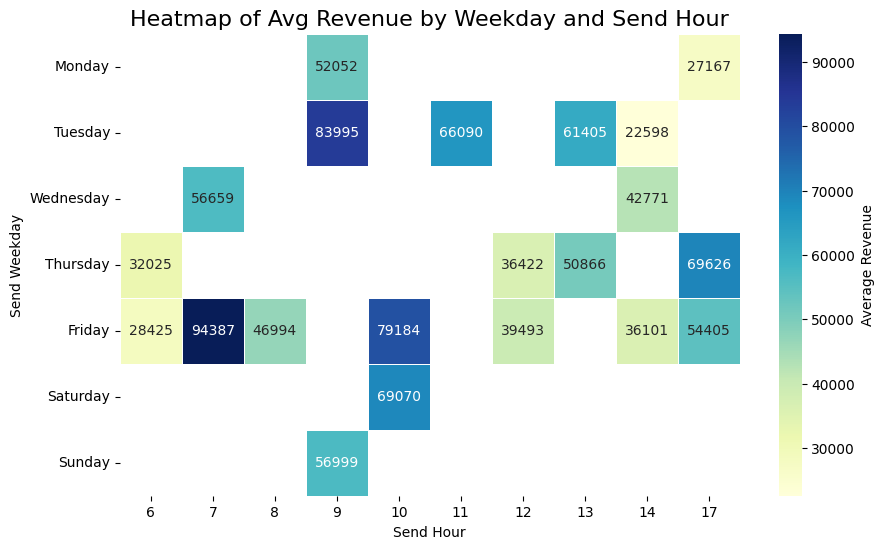

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df1.groupby(['Send Weekday', 'Send Hour'])['Revenue'].mean().reset_index()
heatmap_data = heatmap_data.pivot(index="Send Weekday", columns="Send Hour", values="Revenue")
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data.index = pd.CategoricalIndex(heatmap_data.index, categories=weekday_order, ordered=True)
heatmap_data = heatmap_data.sort_index()

#Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Average Revenue'})
plt.title("Heatmap of Avg Revenue by Weekday and Send Hour", fontsize=16)
plt.xlabel("Send Hour")
plt.ylabel("Send Weekday")
plt.show()

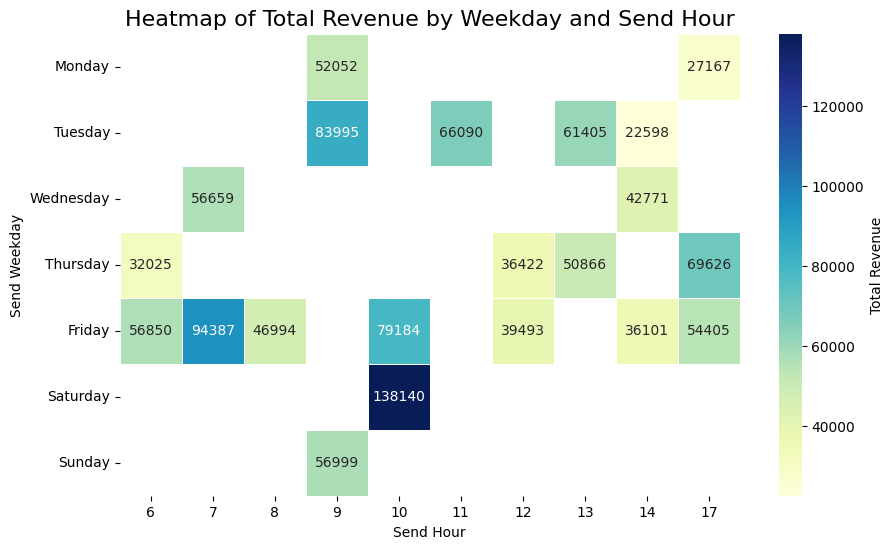

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df1.groupby(['Send Weekday', 'Send Hour'])['Revenue'].sum().reset_index()
heatmap_data = heatmap_data.pivot(index="Send Weekday", columns="Send Hour", values="Revenue")
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data.index = pd.CategoricalIndex(heatmap_data.index, categories=weekday_order, ordered=True)
heatmap_data = heatmap_data.sort_index()

#Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Total Revenue'})
plt.title("Heatmap of Total Revenue by Weekday and Send Hour", fontsize=16)
plt.xlabel("Send Hour")
plt.ylabel("Send Weekday")
plt.show()

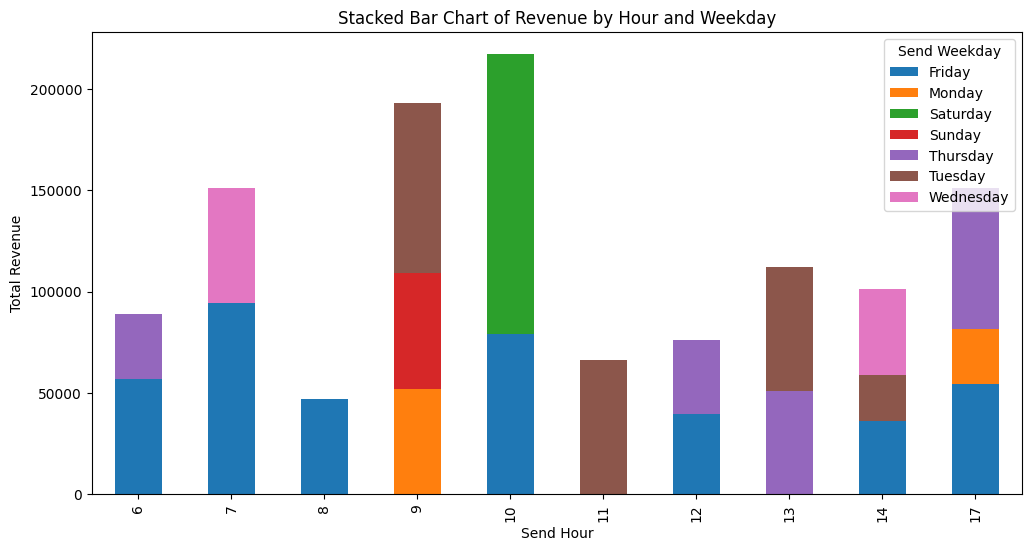

In [ ]:
#trying charts
grouped = df.groupby(['Send Weekday', 'Send Hour']).agg(total_revenue=('Revenue', 'sum')).reset_index()
pivot = grouped.pivot(index='Send Hour', columns='Send Weekday', values='total_revenue')
pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Stacked Bar Chart of Revenue by Hour and Weekday")
plt.ylabel("Total Revenue")
plt.show()

This was good enough to understand which times the client should send the campaigns on specific days of the week.

I tried both avging & summing the revenue but given that we needed an avg metric (click rate, open rate) I found it more logical to rely on the avg revenue data analysis.